# Allsvenskan statistics

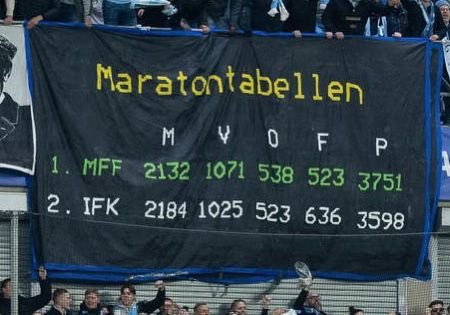
*Maratontabellen (all-time league table) banner from the 2023 game between leaders Malmö FF and runners-up IFK Göteborg*

### Statistics for the swedish Allsvenskan football top flight for the years 1924-2023
Gathered, prepared and presented by Linus Rundberg Streuli

#### Background
For supporters of Malmö FF, looking at the Allsvenskan all-time league table is often a favourite pastime. The team has been in the top since overtaking IFK Göteborg in 2012. The table is [readily available](https://www.svenskfotboll.se/serier-cuper/elitfotboll/historik-herr/maratontabell/) from the Swedish football association (SvFF) website, but I haven't been able to find a plot showing the point progression season for season. So, I set out to make one, using Python.

* Present how the data is gathered by scraping everysport.com and populating an SQLite3 database
* Present how the data is prepared by querying the database and creating Pandas DataFrames with the selected data
* Present how the data is visualised using Matplotlib

#### Gathering the data
The underlying data is taken from the sports statistics website [everysport.com](https://everysport.com). I made a scraper script using `requests` and `BeautifulSoup` to go through every season since the first in 1924-1925. The scraper goes through every round for every season and the data is collected in an `SQLite3` database with models based on `SQLAlchemy`. The scraper class also has a method to update the database as new games are played. The scraper can be found [here](src/scrapers/scraper.py), and the database can be found [here](data/allsvenskan.db).

The database models can be found in [src/models.py](src/models.py). Unfortunately the `SQLAlchemy` version available for Jupyter notebooks lacks some functionality the models are based on and so can't be demonstrated here.

## Preparing the data
The database models have a number of helper methods to prepare and export data. The plot below...

## Plots

### Maratontabellen - the all time league table

The plot below shows the points progression for the selected teams and selected seasons. See below the plot for a list of teams and their index.

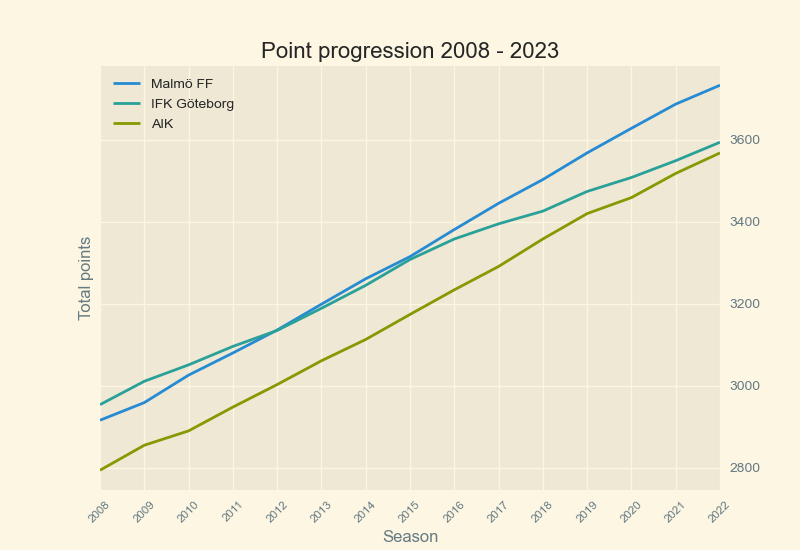

In [51]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json('data/progressions.json')
df.sort_values(axis=1, by=2023, inplace=True, ascending=False)

# Teams between 0 (first) and 67 (last)
selected_teams = slice(0, 3)
# Seasons between 1924 and 2023
seasons = (2008, 2023)

selected_seasons = slice(*df.index.get_indexer(seasons))

df = df.iloc[selected_seasons, selected_teams]

# Plot
plt.style.use('Solarize_Light2')
ax = df.plot(xticks=df.index, xlim=(df.index[0], df.index[-1]))
ax.yaxis.tick_right()
plt.title(f'Point progression {seasons[0]} - {seasons[1]}')
plt.xticks(rotation=45, fontsize='small')
plt.xlabel('Season')
plt.ylabel('Total points')
#plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small')
plt.legend()
plt.show()

## Index of teams
<table style="font-size: 10pt;"><thead><td>Index</td><td>Team</td><td>Index</td><td>Team</td><td>Index</td><td>Team</td><td>Index</td><td>Team</td></thead><tbody><tr><td style="text-align: right; margin-right: 2px;">0</td><td>Malmö FF</td><td style="text-align: right; margin-right: 2px;">11</td><td>GAIS</td><td style="text-align: right; margin-right: 2px;">22</td><td>IK Sleipner</td><td style="text-align: right;">33</td><td>IF Brommapojkarna</td><tr><tr><td style="text-align: right; margin-right: 2px;">1</td><td>IFK Göteborg</td><td style="text-align: right; margin-right: 2px;">12</td><td>Kalmar FF</td><td style="text-align: right; margin-right: 2px;">23</td><td>Gefle IF FF</td><td style="text-align: right;">34</td><td>IFK Sundsvall</td><tr><tr><td style="text-align: right; margin-right: 2px;">2</td><td>AIK</td><td style="text-align: right; margin-right: 2px;">13</td><td>Östers IF</td><td style="text-align: right; margin-right: 2px;">24</td><td>Mjällby AIF</td><td style="text-align: right;">35</td><td>Falkenbergs FF</td><tr><tr><td style="text-align: right; margin-right: 2px;">3</td><td>IFK Norrköping</td><td style="text-align: right; margin-right: 2px;">14</td><td>Landskrona BoIS</td><td style="text-align: right; margin-right: 2px;">25</td><td>IFK Malmö FK</td><td style="text-align: right;">36</td><td>Varbergs BoIS</td><tr><tr><td style="text-align: right; margin-right: 2px;">4</td><td>IF Elfsborg</td><td style="text-align: right; margin-right: 2px;">15</td><td>Degerfors IF</td><td style="text-align: right; margin-right: 2px;">26</td><td>IFK Eskilstuna</td><td style="text-align: right;">37</td><td>Västerås SK FK</td><tr><tr><td style="text-align: right; margin-right: 2px;">5</td><td>Helsingborgs IF</td><td style="text-align: right; margin-right: 2px;">16</td><td>BK Häcken</td><td style="text-align: right; margin-right: 2px;">27</td><td>Jönköpings Södra IF</td><td style="text-align: right;">38</td><td>Syrianska FC</td><tr><tr><td style="text-align: right; margin-right: 2px;">6</td><td>Djurgårdens IF</td><td style="text-align: right; margin-right: 2px;">17</td><td>Åtvidabergs FF</td><td style="text-align: right; margin-right: 2px;">28</td><td>IK Sirius</td><td style="text-align: right;">39</td><td>Råå IF</td><tr><tr><td style="text-align: right; margin-right: 2px;">7</td><td>Halmstads BK</td><td style="text-align: right; margin-right: 2px;">18</td><td>Sandvikens IF</td><td style="text-align: right; margin-right: 2px;">29</td><td>Västra Frölunda IF</td><td style="text-align: right;">40</td><td>IFK Värnamo</td><tr><tr><td style="text-align: right; margin-right: 2px;">8</td><td>Hammarby IF</td><td style="text-align: right; margin-right: 2px;">19</td><td>Trelleborgs FF</td><td style="text-align: right; margin-right: 2px;">30</td><td>IS Halmia</td><td style="text-align: right;">41</td><td>Ljungskile SK</td><tr><tr><td style="text-align: right; margin-right: 2px;">9</td><td>Örgryte IS</td><td style="text-align: right; margin-right: 2px;">20</td><td>GIF Sundsvall</td><td style="text-align: right; margin-right: 2px;">31</td><td>Östersunds FK</td><td style="text-align: right;">42</td><td>AFC Eskilstuna</td><tr><tr><td style="text-align: right; margin-right: 2px;">10</td><td>Örebro SK</td><td style="text-align: right; margin-right: 2px;">21</td><td>IK Brage</td><td style="text-align: right; margin-right: 2px;">32</td><td>Gårda BK</td><td style="text-align: right;">43</td><td>Westermalms IF FK</td><tr><tr><td style="text-align: right; margin-right: 2px;">11</td><td>GAIS</td><td style="text-align: right; margin-right: 2px;">22</td><td>IK Sleipner</td><td style="text-align: right; margin-right: 2px;">33</td><td>IF Brommapojkarna</td><td style="text-align: right;">44</td><td>IFK Uddevalla</td><tr><tr><td style="text-align: right; margin-right: 2px;">12</td><td>Kalmar FF</td><td style="text-align: right; margin-right: 2px;">23</td><td>Gefle IF FF</td><td style="text-align: right; margin-right: 2px;">34</td><td>IFK Sundsvall</td><td style="text-align: right;">45</td><td>Umeå FC</td><tr><tr><td style="text-align: right; margin-right: 2px;">13</td><td>Östers IF</td><td style="text-align: right; margin-right: 2px;">24</td><td>Mjällby AIF</td><td style="text-align: right; margin-right: 2px;">35</td><td>Falkenbergs FF</td><td style="text-align: right;">46</td><td>Hallstahammar SK</td><tr><tr><td style="text-align: right; margin-right: 2px;">14</td><td>Landskrona BoIS</td><td style="text-align: right; margin-right: 2px;">25</td><td>IFK Malmö FK</td><td style="text-align: right; margin-right: 2px;">36</td><td>Varbergs BoIS</td><td style="text-align: right;">47</td><td>Stattena IF</td><tr><tr><td style="text-align: right; margin-right: 2px;">15</td><td>Degerfors IF</td><td style="text-align: right; margin-right: 2px;">26</td><td>IFK Eskilstuna</td><td style="text-align: right; margin-right: 2px;">37</td><td>Västerås SK FK</td><td style="text-align: right;">48</td><td>Motala AIF FK</td><tr><tr><td style="text-align: right; margin-right: 2px;">16</td><td>BK Häcken</td><td style="text-align: right; margin-right: 2px;">27</td><td>Jönköpings Södra IF</td><td style="text-align: right; margin-right: 2px;">38</td><td>Syrianska FC</td><td style="text-align: right;">49</td><td>Dalkurd FF</td><tr><tr><td style="text-align: right; margin-right: 2px;">17</td><td>Åtvidabergs FF</td><td style="text-align: right; margin-right: 2px;">28</td><td>IK Sirius</td><td style="text-align: right; margin-right: 2px;">39</td><td>Råå IF</td><td style="text-align: right;">50</td><td>Ludvika FFI</td><tr><tr><td style="text-align: right; margin-right: 2px;">18</td><td>Sandvikens IF</td><td style="text-align: right; margin-right: 2px;">29</td><td>Västra Frölunda IF</td><td style="text-align: right; margin-right: 2px;">40</td><td>IFK Värnamo</td><td style="text-align: right;">51</td><td>Redbergslid IK</td><tr><tr><td style="text-align: right; margin-right: 2px;">19</td><td>Trelleborgs FF</td><td style="text-align: right; margin-right: 2px;">30</td><td>IS Halmia</td><td style="text-align: right; margin-right: 2px;">41</td><td>Ljungskile SK</td><td style="text-align: right;">52</td><td>IK Oddevold</td><tr><tr><td style="text-align: right; margin-right: 2px;">20</td><td>GIF Sundsvall</td><td style="text-align: right; margin-right: 2px;">31</td><td>Östersunds FK</td><td style="text-align: right; margin-right: 2px;">42</td><td>AFC Eskilstuna</td><td style="text-align: right;">53</td><td>IF Saab</td><tr><tr><td style="text-align: right; margin-right: 2px;">21</td><td>IK Brage</td><td style="text-align: right; margin-right: 2px;">32</td><td>Gårda BK</td><td style="text-align: right; margin-right: 2px;">43</td><td>Westermalms IF FK</td><td style="text-align: right;">54</td><td>IFK Luleå</td><tr><tr><td style="text-align: right; margin-right: 2px;">22</td><td>IK Sleipner</td><td style="text-align: right; margin-right: 2px;">33</td><td>IF Brommapojkarna</td><td style="text-align: right; margin-right: 2px;">44</td><td>IFK Uddevalla</td><td style="text-align: right;">55</td><td>Reymersholms IK</td><tr><tr><td style="text-align: right; margin-right: 2px;">23</td><td>Gefle IF FF</td><td style="text-align: right; margin-right: 2px;">34</td><td>IFK Sundsvall</td><td style="text-align: right; margin-right: 2px;">45</td><td>Umeå FC</td><td style="text-align: right;">56</td><td>BK Derby</td><tr><tr><td style="text-align: right; margin-right: 2px;">24</td><td>Mjällby AIF</td><td style="text-align: right; margin-right: 2px;">35</td><td>Falkenbergs FF</td><td style="text-align: right; margin-right: 2px;">46</td><td>Hallstahammar SK</td><td style="text-align: right;">57</td><td>Norrby IF</td><tr><tr><td style="text-align: right; margin-right: 2px;">25</td><td>IFK Malmö FK</td><td style="text-align: right; margin-right: 2px;">36</td><td>Varbergs BoIS</td><td style="text-align: right; margin-right: 2px;">47</td><td>Stattena IF</td><td style="text-align: right;">58</td><td>Brynäs IF FK</td><tr><tr><td style="text-align: right; margin-right: 2px;">26</td><td>IFK Eskilstuna</td><td style="text-align: right; margin-right: 2px;">37</td><td>Västerås SK FK</td><td style="text-align: right; margin-right: 2px;">48</td><td>Motala AIF FK</td><td style="text-align: right;">59</td><td>Enköpings SK FK</td><tr><tr><td style="text-align: right; margin-right: 2px;">27</td><td>Jönköpings Södra IF</td><td style="text-align: right; margin-right: 2px;">38</td><td>Syrianska FC</td><td style="text-align: right; margin-right: 2px;">49</td><td>Dalkurd FF</td><td style="text-align: right;">60</td><td>Assyriska FF</td><tr><tr><td style="text-align: right; margin-right: 2px;">28</td><td>IK Sirius</td><td style="text-align: right; margin-right: 2px;">39</td><td>Råå IF</td><td style="text-align: right; margin-right: 2px;">50</td><td>Ludvika FFI</td><td style="text-align: right;">61</td><td>Högadals IS</td><tr><tr><td style="text-align: right; margin-right: 2px;">29</td><td>Västra Frölunda IF</td><td style="text-align: right; margin-right: 2px;">40</td><td>IFK Värnamo</td><td style="text-align: right; margin-right: 2px;">51</td><td>Redbergslid IK</td><td style="text-align: right;">62</td><td>Västerås IK</td><tr><tr><td style="text-align: right; margin-right: 2px;">30</td><td>IS Halmia</td><td style="text-align: right; margin-right: 2px;">41</td><td>Ljungskile SK</td><td style="text-align: right; margin-right: 2px;">52</td><td>IK Oddevold</td><td style="text-align: right;">63</td><td>IFK Holmsund</td><tr><tr><td style="text-align: right; margin-right: 2px;">31</td><td>Östersunds FK</td><td style="text-align: right; margin-right: 2px;">42</td><td>AFC Eskilstuna</td><td style="text-align: right; margin-right: 2px;">53</td><td>IF Saab</td><td style="text-align: right;">64</td><td>Sandvikens AIK FK</td><tr><tr><td style="text-align: right; margin-right: 2px;">32</td><td>Gårda BK</td><td style="text-align: right; margin-right: 2px;">43</td><td>Westermalms IF FK</td><td style="text-align: right; margin-right: 2px;">54</td><td>IFK Luleå</td><td style="text-align: right;">65</td><td>IK City</td><tr><tr><td style="text-align: right; margin-right: 2px;">33</td><td>IF Brommapojkarna</td><td style="text-align: right; margin-right: 2px;">44</td><td>IFK Uddevalla</td><td style="text-align: right; margin-right: 2px;">55</td><td>Reymersholms IK</td><td style="text-align: right;">66</td><td>Billingsfors IK</td><tr></tbody></table>

## Extending the project
Curiosity struck me again this summer as i realised the season's northernmost team is IK Sirius from Uppsala, which leaves two thirds of Sweden without representation in the top flight. How doed the 2023 season stand, location-wise?

I set out to gather more data.

#### Gathering more data

I made another [scraper](src/scrapers/scraper.py), this time for Wikipedia. I updated the Team model to include the coordinates to the team's home venue if it was available, or else to the team's home town. With that data I could calculate the mean position for all the games during a certain season. The plot can be found below.

##

In [3]:
import plotly.express as px
import json

df2 = pd.read_json('data/coords.json')
with open('data/teams.json', 'r') as f:
    teams = json.load(f)
years = [int(y[:4]) for y in df2.index]
fig = px.scatter_mapbox(df2, lat='lat_mean', lon='lon_mean', size='lat_mean', size_max=10, hover_name=df2.index, color=years, color_continuous_scale='bluered', zoom=6)
#fig = px.scatter_mapbox(df2, lat='lat_mean', lon='lon_mean', size='lat_mean', size_max=10, hover_name=df2.index, hover_data=[{'teams': teams for s in df2.index]})
fig.update_layout(mapbox_style='open-street-map', title='Mean location of games per season, Allsvenskan 1924-2023')
fig.show()

![Mean location of games per season, Allsvenskan 1924-2023](plots/coords.png)

#### Some thoughts on the locations
It would seem that the mean location of games during a season is slowly crawling towards the northwest, perhaps in part owing to Malmö FF's dominance in the southern parts with classic teams such as Helsingborgs IF and Trelleborgs FF failing to stay in Allsvenskan more than a season to two before dropping out again. This could make it harder for those teams to attract talented players in the region.

Östersunds FK's stay in Allsvenskan between 2016 and 2021 also contributes to those seasons sticking out, especially since another northern team, GIF Sundsvall, also played in the top flight during those years.

The season of 1971 is also of interest as it was the only season in Allsvenskan to date for IFK Luleå, the northernmost team ever to play in the league by more than 200 kilometers.

Which brings us to distances.

#### Distances
With the coordinates gathered there was more to do! Using the [haversine formula](https://en.wikipedia.org/wiki/Haversine_formula) to calculate the distances between the different venues, I could plot the accumulated distances the teams have travelled during each season (if they travel by crow).

*Caveat: the number of teams in the league has varied which the plot currently does not care about at all*

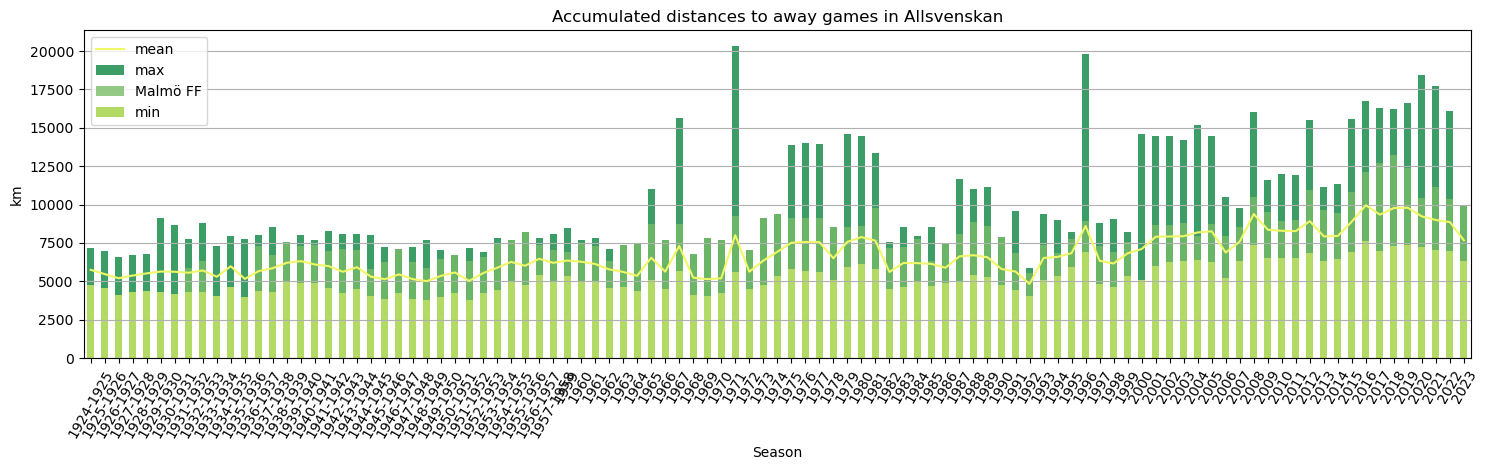

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_distances(team=None):
    """ Plot distances. 
            
            Keyword arguments: 
                team : str
                    Select a team to plot along max, min and mean distances
    """
    cmap = plt.get_cmap('summer')
    # colors = iter(cmap.colors)
    df = pd.read_json('data/distances.json')
    max = df.max(axis=1)
    min = df.min(axis=1)
    mean = df.mean(axis=1)
    df2 = pd.DataFrame({'max': max, 'min': min, 'mean': mean})
    fig, ax = plt.subplots()
    fig.set_figwidth(15)
    fig.set_tight_layout('tight')
    df2['max'].plot(kind='bar', ax=ax, color=cmap(60))
    if team is not None:
        team_data = df[team]
        df2[team] = team_data
        df2[team].plot(kind='bar', ax=ax, color=cmap(120), alpha=.8)
    df2['min'].plot(kind='bar', ax=ax, color=cmap(180))
    df2['mean'].plot.line(color=cmap(240))
    plt.title('Accumulated distances to away games in Allsvenskan')
    plt.xlabel('Season')
    plt.ylabel('km')
    plt.legend()
    plt.xticks(rotation=60)
    #ax.set_xticklabels(df.index)
    # plt.yticks(major_ticks)
    plt.grid(which='both', axis='y')
    plt.show()

plot_distances('Malmö FF')